Ali Fırat Özel - 18120205038

Data Mining HW-01

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url.split('/')[-2])
dFrame = pd.read_csv(url2)
dFrame.info()

18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                          

1 - 

In [9]:
test = dFrame.describe()
test
# ilk üç bilgi bizim için gerekli değil
print(test[3:8])

     metro_area  census_fips_code  \
min         NaN               NaN   
25%         NaN               NaN   
50%         NaN               NaN   
75%         NaN               NaN   
max         NaN               NaN   

     retail_and_recreation_percent_change_from_baseline  \
min                                             -100.0    
25%                                              -44.0    
50%                                              -24.0    
75%                                               -8.0    
max                                              333.0    

     grocery_and_pharmacy_percent_change_from_baseline  \
min                                             -100.0   
25%                                               -9.0   
50%                                                5.0   
75%                                               18.0   
max                                              321.0   

     parks_percent_change_from_baseline  \
min                           

2 - 

1  -    9 - 10     9 - 11     9 - 12     9 - 13     9 - 14    
2  -   10 - 11    10 - 12    10 - 13    10 - 14    
3  -   11 - 12    11 - 13    11 - 14    
4  -   12 - 13    12 - 14    
5  -   13 - 14    


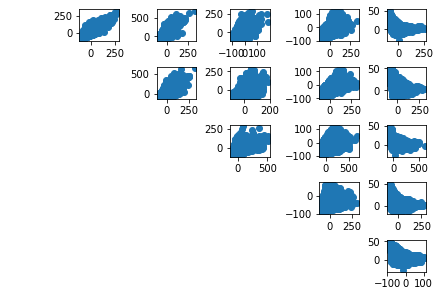

In [10]:
fig, axes = plt.subplots(nrows=5,ncols=6,constrained_layout=True)

for i in range(5):
    print(i + 1, " -", end="   ")
    for j in range(6):
        if i >= j:
            axes[i,j].axis('off')
            continue
        axes[i,j].scatter(dFrame.iloc[:, 9 + i], dFrame.iloc[:, 9 + j])
        strngi,strngj = str(9 + i),str(9 + j)
        print(strngi.rjust(2), "-", strngj.rjust(2), end="    ")
    print("")




3 -

1  -  retail_and_recreation_percent_change_from_baseline
2  -  grocery_and_pharmacy_percent_change_from_baseline
3  -  parks_percent_change_from_baseline
4  -  transit_stations_percent_change_from_baseline
5  -  workplaces_percent_change_from_baseline
6  -  residential_percent_change_from_baseline


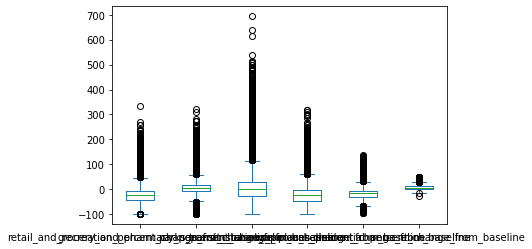

In [11]:
#tüm siyah çemberler outlier
dFrame.iloc[:,9:15].plot(kind = "box")
for i in range(6):
    print(i + 1 ," - ", dFrame.columns[9 + i])

4 -

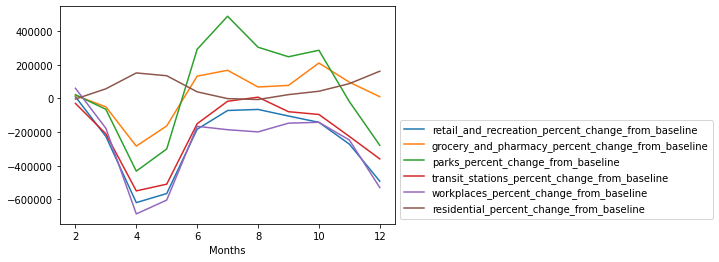

In [12]:
date_series_4 = pd.to_datetime(dFrame['date'])
#print(date_series)
date_index_4 = pd.DatetimeIndex(date_series_4.values).month
#print(date_index)
#print(df.index)
dFrame4 = dFrame.set_index(date_index_4)
#print(df2.index)
dFrame4.index.name = 'Months'
dFrame4 = dFrame4.iloc[:, 9:15].fillna(0)
dFrame4.groupby('Months').sum().plot().legend(bbox_to_anchor=(1.0, 0.5))


5 -

In [13]:
# verilen url
url5 = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'

#yeni indirme linkini ilk başta verilen gibi düzenledik veya direk yapıştırabiliriz de
url5_download ='https://drive.google.com/uc?id=' + url5.split('/')[-2]
dFrame5 = pd.read_csv(url5_download)

#zamanlar çekildi
date_series_5 = pd.to_datetime(dFrame5['date'])
#aylar diziye atandı
date_index_5 = pd.DatetimeIndex(date_series_5.values).month
#indexleri aylarla değiştirdik
dFrame5_2 = dFrame5.set_index(date_index_5)
#index adını Months yaptık
dFrame5_2.index.name = 'Months'
#9-14. sütunları alıp NaN kısımları sıfırladık
dFrame5_2 = dFrame5_2.iloc[:, 9:15].fillna(0)


In [14]:
# do not run this cell multiple times 
# just once to change column names to name + 2020/2021
# grafiklerde çizgiler karışmasın diye sütunların isimlerini ayarladık

for index in range(len(dFrame4.columns)):
     dFrame4.columns.values[index] += " 2020"

for index in range(len(dFrame5_2.columns)):
    dFrame5_2.columns.values[index] += " 2021"
    

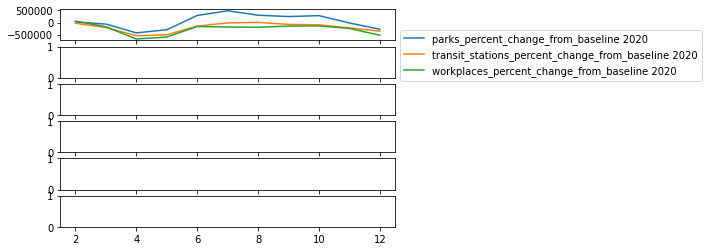

In [32]:
fig, axes = plt.subplots(sharex=True, nrows=len(dFrame4.columns))
# for index in range(0, len(dFrame4.columns)):
#     dFrame4.iloc[:, index].groupby('Months').sum().plot(ax=axes[index]).legend(bbox_to_anchor=(1.0, 0.5))
#     dFrame5_2.iloc[:, index].groupby('Months').sum().plot(ax = axes[index]).legend(bbox_to_anchor=(1.0, 0.5))

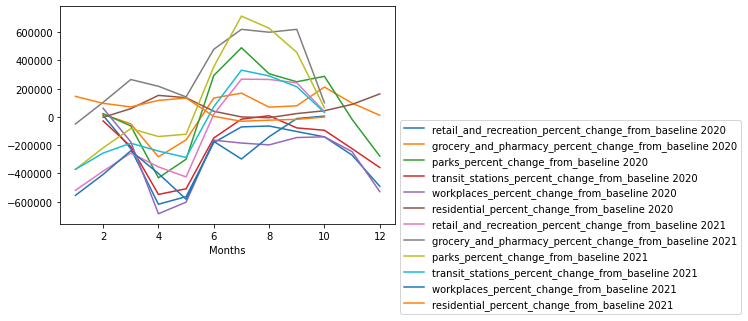

In [28]:
fig, axes = plt.subplots()
dFrame4.groupby('Months').sum().plot(ax=axes).legend(bbox_to_anchor=(1.0, 0.5))
dFrame5_2.groupby('Months').sum().plot(ax=axes).legend(bbox_to_anchor=(1.0, 0.5))